In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading transformed data from task-1


In [3]:
df_trans= pd.read_csv("/content/drive/MyDrive/week 1/transformed_raw.csv")
df_trans.head()

,Unnamed: 0,headline,url,publisher,date,stock,datetime,sentiment_score,sentiment,tokens,topic
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05 14:30:54+00:00,0.000,Neutral,"['Stocks', 'That', 'Hit', 'Week', 'Highs', 'On...",2
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03 14:45:20+00:00,0.000,Neutral,"['Stocks', 'That', 'Hit', 'Week', 'Highs', 'On...",2
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26 08:30:07+00:00,0.000,Neutral,"['Biggest', 'Movers', 'From', 'Friday']",4
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22 16:45:06+00:00,0.000,Neutral,"['Stocks', 'Moving', 'In', 'Fridays', 'MidDay'...",2
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22 15:38:59+00:00,0.296,Positive,"['B', 'A', 'Securities', 'Maintains', 'Neutral...",3


In [2]:
df_apple = pd.read_csv('C:\\Users\\Aman\\Desktop\\kifyaw1\\yfinance_data\\AAPL_historical_data.csv')
df_apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [3]:
def change_to_datetime(df, column):
  """To covert an object to datetime dtype
  takes data framw and column name to be converted """

  df[column] = pd.to_datetime(df[column])
  return df

df_apple= change_to_datetime(df_apple,"Date")
df_apple.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10998 non-null  datetime64[ns]
 1   Open          10998 non-null  float64       
 2   High          10998 non-null  float64       
 3   Low           10998 non-null  float64       
 4   Close         10998 non-null  float64       
 5   Adj Close     10998 non-null  float64       
 6   Volume        10998 non-null  int64         
 7   Dividends     10998 non-null  float64       
 8   Stock Splits  10998 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 773.4 KB


In [4]:
import talib

talib.__version__

'0.4.32'

In [7]:
df_apple['SMA_20'] = talib.SMA(df_apple['Close'], timeperiod=20)
df_apple['EMA_20'] = talib.EMA(df_apple['Close'], timeperiod=20)
df_apple['RSI'] = talib.RSI(df_apple['Close'], timeperiod=14)

df_apple['MACD'], df_apple['Signal'], df_apple['Hist'] = talib.MACD(
    df_apple['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

df_apple['ADX'] = talib.ADX(df_apple['High'], df_apple['Low'], df_apple['Close'], timeperiod=14)

df_apple['SlowK'], df_apple['SlowD'] = talib.STOCH(
    df_apple['High'], df_apple['Low'], df_apple['Close'],
    fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

df_apple['Upper_Band'], df_apple['Middle_Band'], df_apple['Lower_Band'] = talib.BBANDS(
    df_apple['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

df_apple['ATR'] = talib.ATR(df_apple['High'], df_apple['Low'], df_apple['Close'], timeperiod=14)

df_apple['OBV'] = talib.OBV(df_apple['Close'], df_apple['Volume'])

df_apple['AD'] = talib.AD(df_apple['High'], df_apple['Low'], df_apple['Close'], df_apple['Volume'])









In [8]:
df_filtered = df_apple[df_apple['Date'] >= '2000-01-01']
df_filtered.set_index(df_filtered['Date'])

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,...,Hist,ADX,SlowK,SlowD,Upper_Band,Middle_Band,Lower_Band,ATR,OBV,AD
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.844004,535796800,0.0,0.0,0.918973,...,0.000471,23.561199,78.424114,60.794825,1.028787,0.918973,0.809159,0.049973,6.996527e+10,-3.387578e+10
2000-01-04,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.772846,512377600,0.0,0.0,0.912946,...,-0.000869,23.882045,79.255458,73.245675,1.008816,0.912946,0.817077,0.053260,6.945289e+10,-3.424564e+10
2000-01-05,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.784155,778321600,0.0,0.0,0.906780,...,-0.000991,24.179973,68.261030,75.313534,0.979073,0.906780,0.834487,0.054597,7.023121e+10,-3.481814e+10
2000-01-06,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.716296,767972800,0.0,0.0,0.900056,...,-0.006324,22.630428,35.802286,61.106258,0.967721,0.900056,0.832390,0.058351,6.946324e+10,-3.558611e+10
2000-01-07,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.750226,460734400,0.0,0.0,0.897489,...,-0.006936,21.191564,26.589447,43.550921,0.962793,0.897489,0.832185,0.058009,6.992397e+10,-3.537669e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.228500,...,-2.016164,37.721347,26.636056,38.031624,237.809121,224.228500,210.647878,5.323224,1.608282e+11,4.588644e+10
2024-07-25,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.440500,...,-2.344640,35.852163,17.521847,28.257777,237.449323,224.440500,211.431677,5.387995,1.607768e+11,4.588240e+10
2024-07-26,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.633500,...,-2.453164,34.116492,11.493563,18.550489,237.127285,224.633500,212.139714,5.251710,1.608184e+11,4.588742e+10


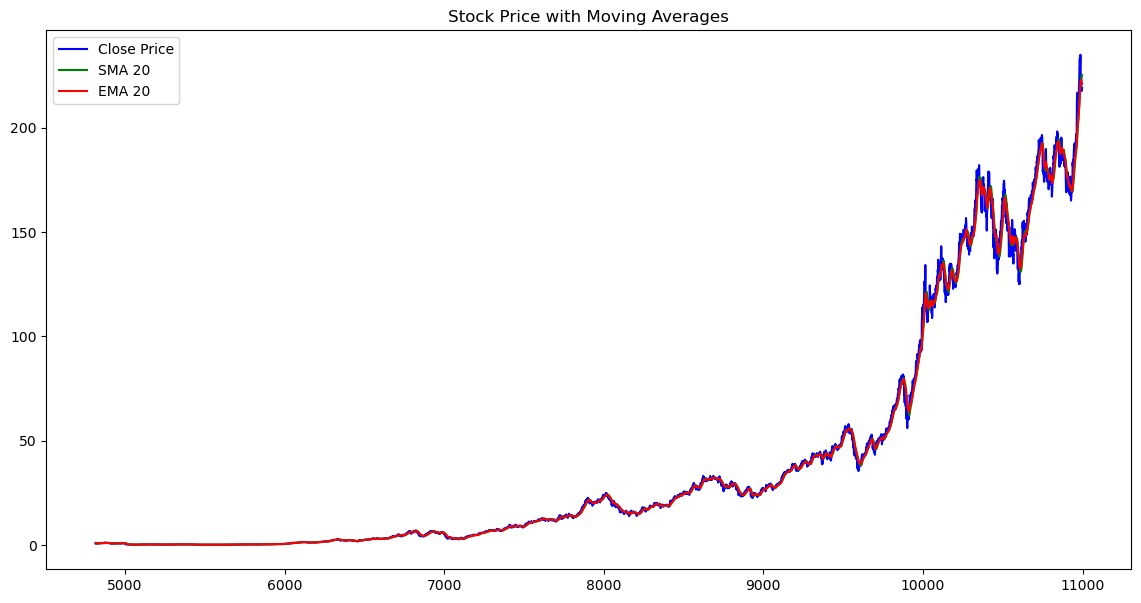

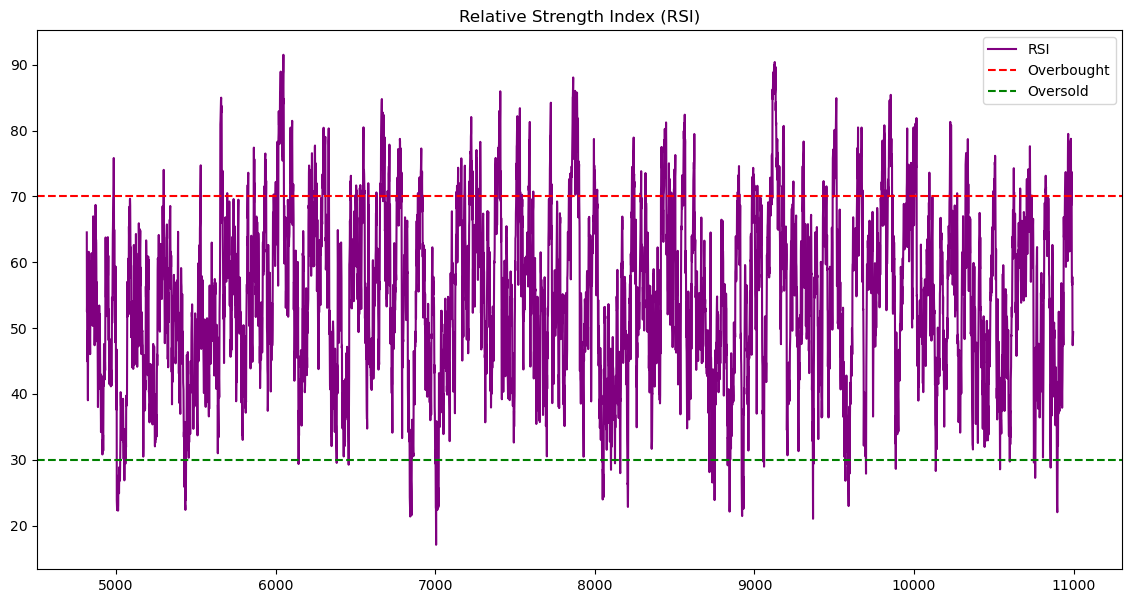

In [9]:

# Plot Close Price with SMA and EMA
plt.figure(figsize=(14, 7))
plt.plot(df_filtered['Close'], label='Close Price', color='blue')
plt.plot(df_filtered['SMA_20'], label='SMA 20', color='green')
plt.plot(df_filtered['EMA_20'], label='EMA 20', color='red')
plt.title('Stock Price with Moving Averages')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 7))
plt.plot(df_filtered['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()


c:\Users\Aman\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


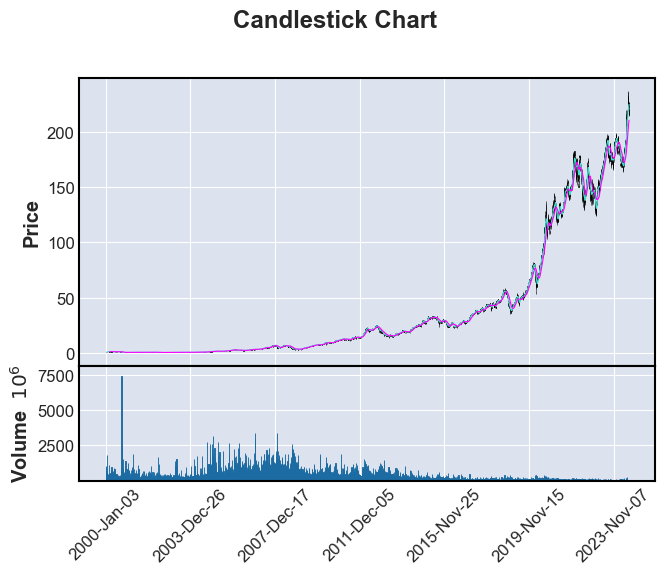

In [11]:
import mplfinance as mpf


mpf.plot(df_filtered.set_index(df_filtered['Date']), type='candle', mav=(20, 50), volume=True, title='Candlestick Chart')


Strtegy Backtesting

C:\Users\Aman\AppData\Local\Temp\ipykernel_1720\3204394400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Buy_Signal'] = (df_filtered['RSI'] < 30) & (df_filtered['MACD'] > df_filtered['Signal'])
C:\Users\Aman\AppData\Local\Temp\ipykernel_1720\3204394400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sell_Signal'] = (df_filtered['RSI'] > 70) & (df_filtered['MACD'] < df_filtered['Signal'])


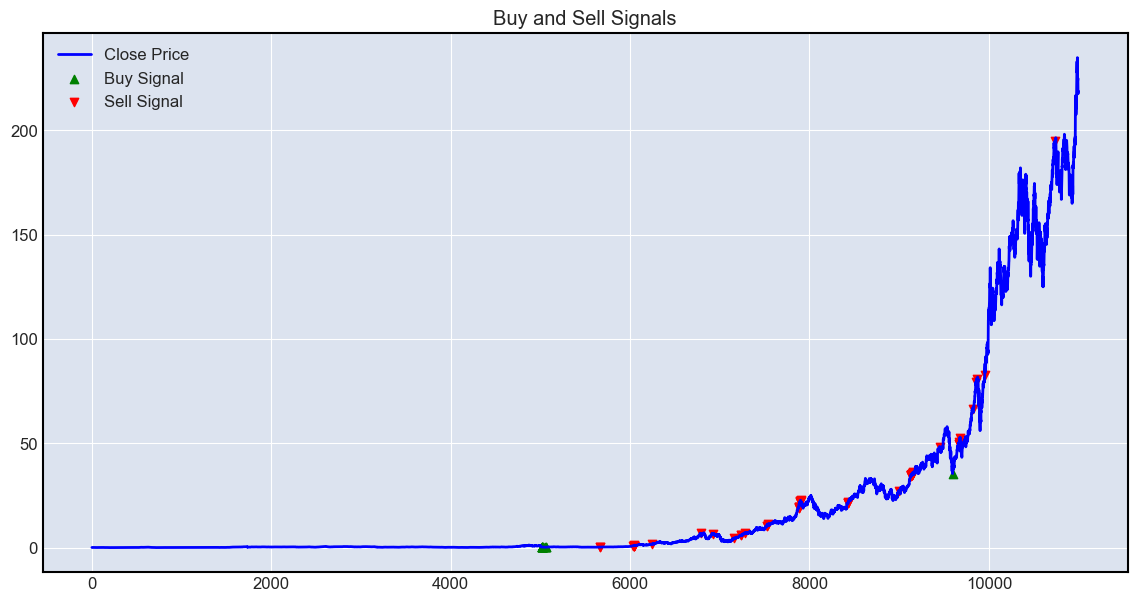

In [14]:
df_filtered['Buy_Signal'] = (df_filtered['RSI'] < 30) & (df_filtered['MACD'] > df_filtered['Signal'])
df_filtered['Sell_Signal'] = (df_filtered['RSI'] > 70) & (df_filtered['MACD'] < df_filtered['Signal'])

# Plot signals
plt.figure(figsize=(14, 7))
plt.plot(df_apple['Close'], label='Close Price', color='blue')
plt.scatter(df_filtered.index[df_filtered['Buy_Signal']], df_filtered['Close'][df_filtered['Buy_Signal']], label='Buy Signal', marker='^', color='green')
plt.scatter(df_filtered.index[df_filtered['Sell_Signal']], df_filtered['Close'][df_filtered['Sell_Signal']], label='Sell Signal', marker='v', color='red')
plt.legend()
plt.title('Buy and Sell Signals')
plt.show()


Stastical Analysis

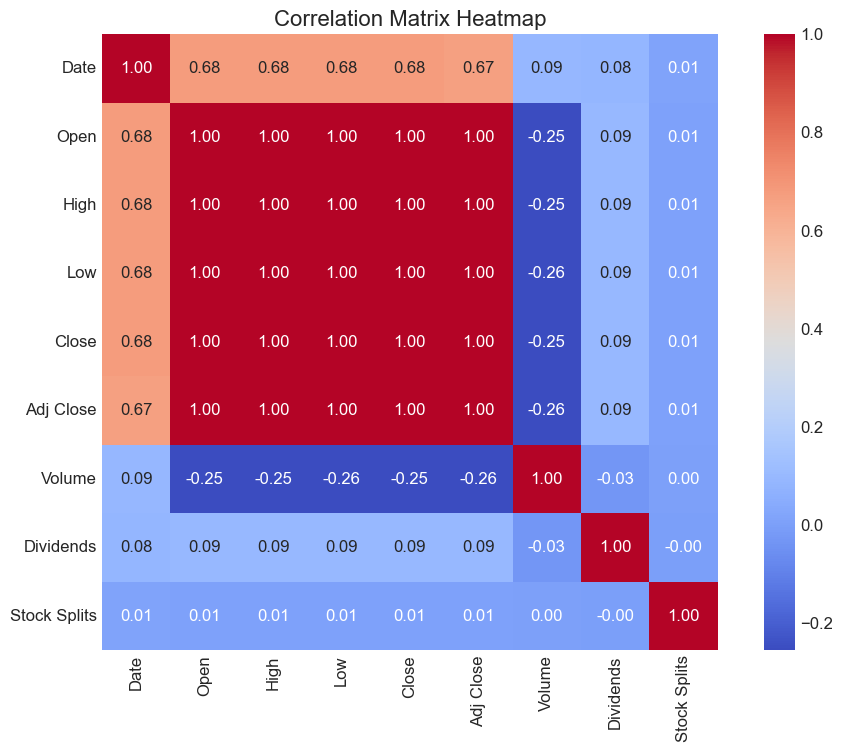

In [14]:

corr_matrix = df_apple[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits']].corr()

plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Add title
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()